# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 13 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_sample = norm_distr.rvs(size=N)
laplas_sample = laplacian_distr.rvs(size=N)
cauchy_sample = cauchy_distr.rvs(size=N)

Постройте график плотности распределения для всех трех распределений на одних осях.

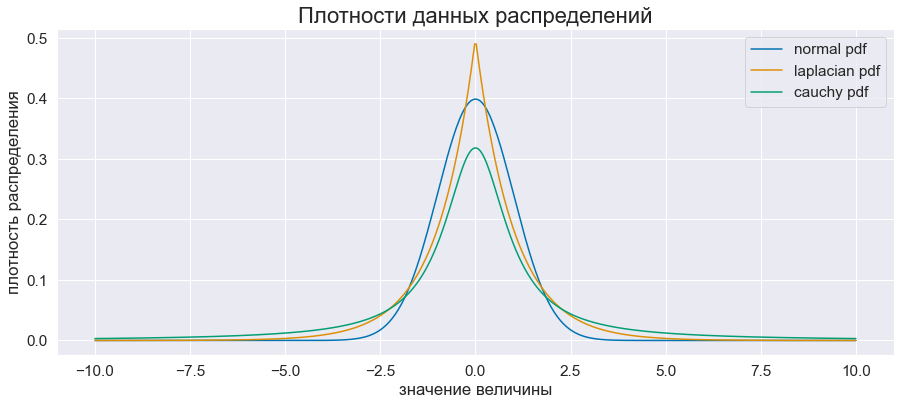

In [3]:
grid = np.linspace(-10, 10, 500)

plt.figure(figsize=(15, 6))
sns.lineplot(x=grid, y=norm_distr.pdf(grid), color=color_for_normal, label="normal pdf")
sns.lineplot(x=grid, y=laplacian_distr.pdf(grid), color=color_for_laplace, label="laplacian pdf")
sns.lineplot(x=grid, y=cauchy_distr.pdf(grid), color=color_for_cauchy, label="cauchy pdf")
plt.xlabel('значение величины')
plt.ylabel('плотность распределения')
plt.title('Плотности данных распределений', fontsize=22)
plt.show()

In [4]:
print(f"Normal sample min: {round(np.min(norm_sample), 3)}, max: {np.round(np.max(norm_sample), 3)}")
print(f"Laplacian sample min: {round(np.min(laplas_sample), 3)}, max: {np.round(np.max(laplas_sample), 3)}")
print(f"Cauchy sample min: {round(np.min(cauchy_sample), 3)}, max: {np.round(np.max(cauchy_sample), 3)}")

Normal sample min: -2.87, max: 2.648
Laplacian sample min: -5.055, max: 5.58
Cauchy sample min: -291.133, max: 5115.495


Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:**
Матож по выборке найти у распределения Коши будет найти сложнее, потому что у него не имеется теоретического матожидания.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [5]:
import math

def truncated_mean(sample, alpha=0.3):
    if alpha > 0.5:
        return truncated_mean(sample, alpha=(1 - alpha))
    return np.mean(np.sort(sample)[int(alpha * sample.size):int((1 - alpha) * sample.size)])

def trunc_cummean(sample, alpha=0.3):
    return np.vectorize(lambda i: float(truncated_mean(sample[:(i + 1)], alpha)))(np.arange(sample.size))

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [6]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    quantile = distr.ppf(q=1 - alpha)
    integral = quad(func=lambda x: np.square(x) * distr.pdf(x), a=0, b=quantile)[0]
    denom = np.square(1 - 2 * alpha)
    return 2 * (integral + alpha * np.square(quantile)) / denom

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

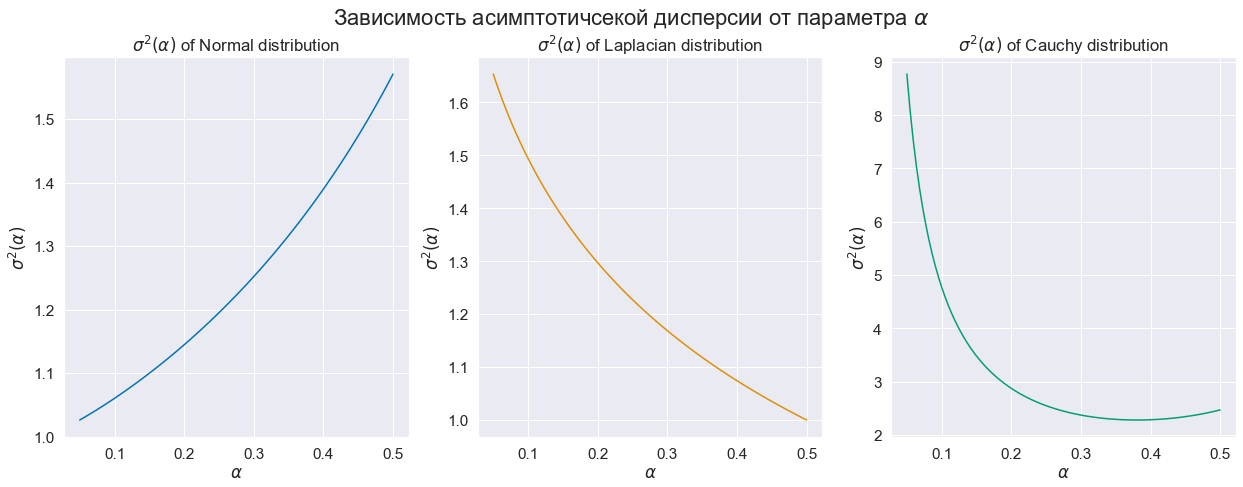

In [7]:
alpha_grid = np.linspace(0.05, 0.49999, 100)
asymp_var_vec = np.vectorize(asymp_var)
colors = [color_for_normal, color_for_laplace, color_for_cauchy]
dists = [norm_distr, laplacian_distr, cauchy_distr]
titles = ['Normal', 'Laplacian', 'Cauchy']

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
for i in range(3):
    sns.lineplot(ax=axes[i], x=alpha_grid, y=asymp_var_vec(dists[i], alpha_grid), color=colors[i])
    axes[i].set_title(f'$\\sigma^2(\\alpha)$ of {titles[i]} distribution')
    axes[i].set_ylabel('$\\sigma^2(\\alpha)$')
    axes[i].set_xlabel('$\\alpha$')
fig.suptitle("Зависимость асимптотичсекой дисперсии от параметра $\\alpha$", fontsize=22)
plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** усеченное среднее порядка `0` - это выборочная средняя, а порядка `0.5` - выборочная медиана.
ПО графику можно увидеть, что:
1. у нормального распределения наименьший разлет имеет выборочная средняя, а наихудший - выборочная медиана.
2. у распределения лапласа все наоборот
3. у распределения Коши не имеется теор.матожа, и соотвественно огромный разлет у выборочной средней, а усеченное среднее  порядка `0.35` имеет наименьшую дисперсию. Медиана тоже не сильно разлетается.

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [8]:
def cummedian(sample):
    return np.vectorize(lambda i: float(np.median(sample[:(i + 1)])))(np.arange(sample.size))

norm_mean = np.cumsum(norm_sample) / np.arange(1, N + 1)
norm_median = cummedian(norm_sample)
norm_trunc_mean = trunc_cummean(norm_sample, 0.35)

laplas_mean = np.cumsum(laplas_sample) / np.arange(1, N + 1)
laplas_median = cummedian(laplas_sample)
laplas_trunc_mean = trunc_cummean(laplas_sample, 0.35)

cauchy_mean = np.cumsum(cauchy_sample) / np.arange(1, N + 1)
cauchy_median = cummedian(cauchy_sample)
cauchy_trunc_mean = trunc_cummean(cauchy_sample, 0.35)

C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Нормальное распределение**

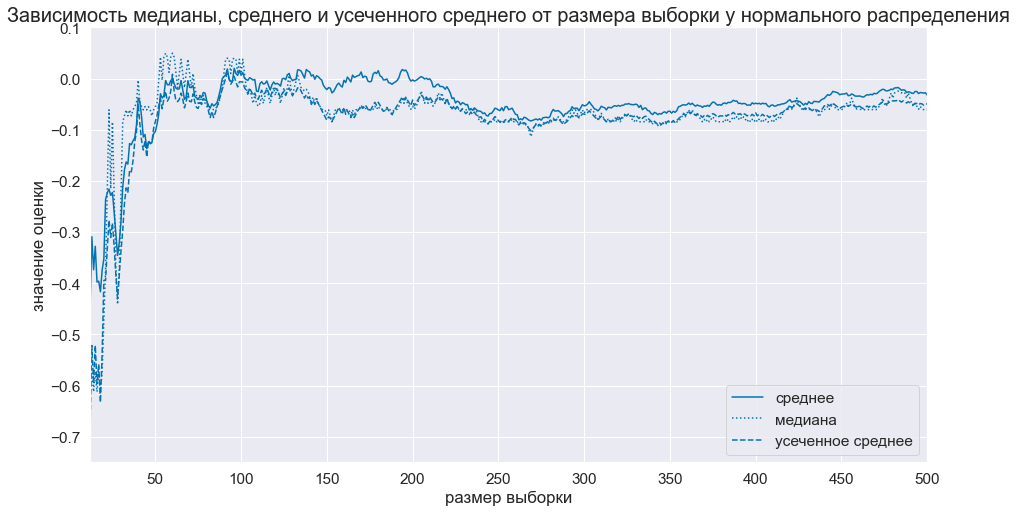

In [9]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
sns.lineplot(x=grid, y=norm_mean, linestyle='-', color=color_for_normal, label='среднее')
sns.lineplot(x=grid, y=norm_median, linestyle=':', color=color_for_normal, label='медиана')
sns.lineplot(x=grid, y=norm_trunc_mean, linestyle='--', color=color_for_normal, label='усеченное среднее')
plt.ylabel("значение оценки")
plt.xlabel("размер выборки")
plt.title("Зависимость медианы, среднего и усеченного среднего от размера выборки у нормального распределения", fontsize=20)
plt.xlim((12, N))
plt.ylim((-0.75, 0.1))
plt.xticks(np.arange(50, N + 1, 50))
plt.show()

**Распределение Лапласа**

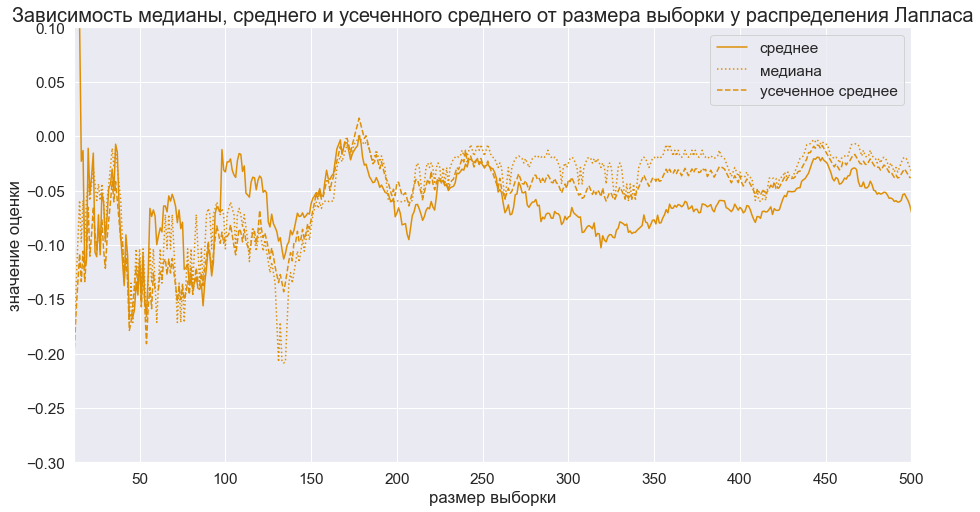

In [10]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
sns.lineplot(x=grid, y=laplas_mean, linestyle='-', color=color_for_laplace, label='среднее')
sns.lineplot(x=grid, y=laplas_median, linestyle=':', color=color_for_laplace, label='медиана')
sns.lineplot(x=grid, y=laplas_trunc_mean, linestyle='--', color=color_for_laplace, label='усеченное среднее')
plt.ylabel("значение оценки")
plt.xlabel("размер выборки")
plt.title("Зависимость медианы, среднего и усеченного среднего от размера выборки у распределения Лапласа", fontsize=20)
plt.xlim((12, N))
plt.ylim((-0.3, 0.1))
plt.xticks(np.arange(50, N + 1, 50))
plt.show()

**Распределение Коши**

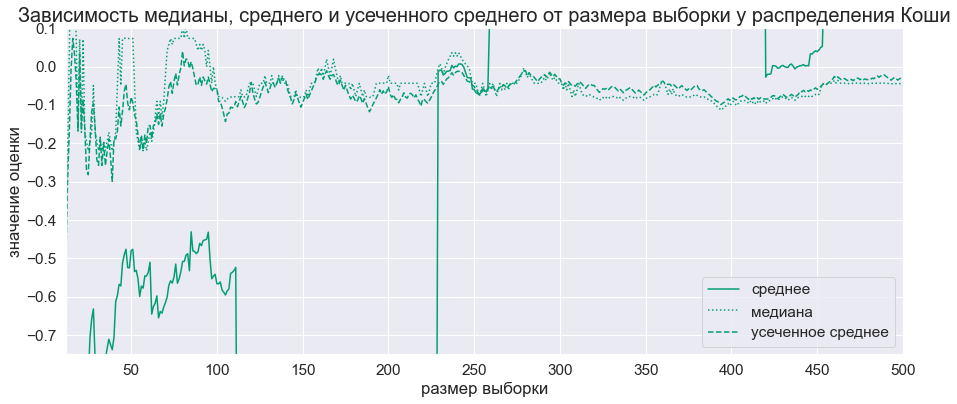

In [11]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(15, 6))
sns.lineplot(x=grid, y=cauchy_mean, linestyle='-', color=color_for_cauchy, label='среднее')
sns.lineplot(x=grid, y=cauchy_median, linestyle=':', color=color_for_cauchy, label='медиана')
sns.lineplot(x=grid, y=cauchy_trunc_mean, linestyle='--', color=color_for_cauchy, label='усеченное среднее')
plt.ylabel("значение оценки")
plt.xlabel("размер выборки")
plt.title("Зависимость медианы, среднего и усеченного среднего от размера выборки у распределения Коши", fontsize=20)
plt.xlim((12, N))
plt.ylim((-0.75, 0.1))
plt.xticks(np.arange(50, N + 1, 50))
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** эти графики полностью подтверждают верность выводов сделанных после прдыдущего графика. Т.е. с увеличением размера выборки у нормального распределения выборочная средняя все плавнее стремится к нулю, а медиана заметно отклоняется иногда, а у усеченное среднее чуть слабее отклоняется чем выборочная медиана. У распределения ситуация наоборот. Там лучше всего себя ведет выборочная медиана. А у распределения Коши как и ожидалось, выборочная средняя очень сильно отклоняется, а усеченная средняя себя ведет лучше всех.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [12]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: E:\Mumtozbek\Statistics_practice\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|##########| 101k/101k [00:00<00:00, 3.62MB/s]


In [13]:
import pandas as pd

In [14]:
data = pd.read_csv("winequality-red.csv")

In [15]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [16]:
def define_category(x):
    if x > 12:
        return 'high alcohol'
    if x <= 10:
        return 'low alcohol'
    return 'medium alcohol'
data['category'] = data['alcohol'].apply(define_category)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low alcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,low alcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium alcohol
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium alcohol
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [17]:
groups = data.groupby('category')
new_data = groups.mean()
new_data = new_data.loc[:, new_data.columns.intersection(['residual sugar'])]
new_data['median'] = groups.median()['residual sugar']
new_data.rename(columns={'residual sugar': 'mean'}, inplace=True)
new_data['mean'] = np.round(new_data['mean'], 2)
new_data

,mean,median
category,,
high alcohol,2.76,2.3
low alcohol,2.45,2.1
medium alcohol,2.59,2.2


Для большей информативности рассмотрим еще и моды в этих группах:

In [18]:
new_data['mode'] = [groups.get_group('high alcohol')['residual sugar'].mode().iloc[-1],
                    groups.get_group('low alcohol')['residual sugar'].mode().iloc[-1],
                    groups.get_group('medium alcohol')['residual sugar'].mode().iloc[-1]]
new_data

,mean,median,mode
category,,,
high alcohol,2.76,2.3,2.1
low alcohol,2.45,2.1,2.0
medium alcohol,2.59,2.2,2.0


In [19]:
sugar = data['residual sugar']
print(f"Медиана сахара в целом: {sugar.median()}")
print(f"Средняя доля сахара в целом: {round(sugar.mean(), 2)}")
print(f"Мода сахара в целом: {sugar.mode().iloc[-1]}")

Медиана сахара в целом: 2.2
Средняя доля сахара в целом: 2.54
Мода сахара в целом: 2.0


В категориях среднего и низкого содержания алкоголя картина схожа с картиной в целом, рассмотрим размеры выборок из каждой категории (видимо, суммарно эти две категории составляют почти все выборку):

In [20]:
(groups.get_group('high alcohol').shape[0], 
 groups.get_group('medium alcohol').shape[0], 
 groups.get_group('low alcohol').shape[0])

(141, 711, 747)

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Можно увидеть, что мода, медиана содержания сахара примерно совпадают, но среднее значение отличается везде, поэтому однозначно невозможно сказать как сахар распределен по категориям и в целом.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

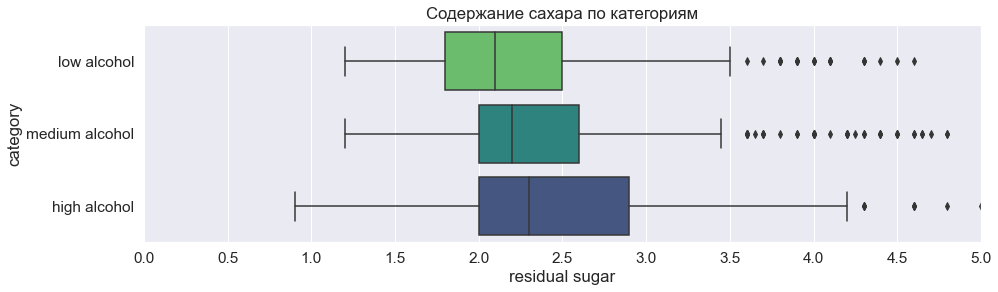

In [21]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize=(15, 4))
sns.boxplot(y=data['category'], x=data['residual sugar'], palette=palette)
plt.xlim((0, 5))
plt.xticks(np.arange(0, 5.1, 0.5))
plt.title("Содержание сахара по категориям")
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** можно сказать, что медианы из боксплота и из предыдущего пункта совпали. Если бы содержание сахара было точно распределено наормально, то следовало бы использовать выборочнее среднее. Но, тут можно увидеть что есть выбросы в каждой группе вин, поэтому тут лучше использовать медиану для оценивания.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

In [22]:
good_wine = data[data['quality'] == 8].drop(columns=['category'])
bad_wine = data[data['quality'] == 3].drop(columns=['category'])
(good_wine.shape, bad_wine.shape)

((18, 12), (10, 12))

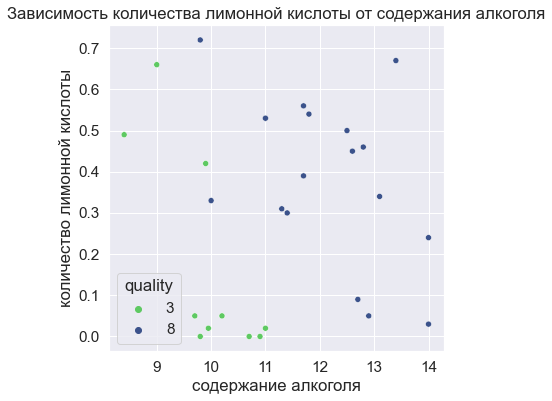

In [23]:
tmp_data = data[(data['quality'] == 3) | (data['quality'] == 8)].drop(columns=['category'])
plt.figure(figsize=(6, 6))
sns.scatterplot(data=tmp_data, 
                x='alcohol', 
                y='citric acid', 
                palette=[palette[0], palette[-1]], 
                hue='quality')
plt.ylabel('количество лимонной кислоты')
plt.xlabel('содержание алкоголя')
plt.title('Зависимость количества лимонной кислоты от содержания алкоголя')
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [24]:
def get_mle_covariance(sample):
    """
    a numpy array of shape (n_observations, n_features) is passed.
    returns a numpy array of shape (n_features, n_features) -- the MLE of covariance of features
    """
    return np.cov(sample.T, bias=True)

In [25]:
bad_wine_sample = bad_wine[['alcohol', 'citric acid']].to_numpy()
good_wine_sample = good_wine[['alcohol', 'citric acid']].to_numpy()

bad_mu = np.mean(bad_wine_sample, axis=0)
good_mu = np.mean(good_wine_sample, axis=0)

bad_cov = get_mle_covariance(bad_wine_sample)
good_cov = get_mle_covariance(good_wine_sample)

X = np.linspace(8, 15, 200) # grid for `alcohol`
Y = np.linspace(-0.4, 1, 200) # grid fot `citric acid`

grid = np.transpose([np.tile(X, Y.size), np.repeat(Y, X.size)]).reshape((Y.size, X.size, 2))

good_pdf = sps.multivariate_normal(mean=good_mu, cov=good_cov).pdf(grid)
bad_pdf = sps.multivariate_normal(mean=bad_mu, cov=bad_cov).pdf(grid)
bad_pdf.shape

(200, 200)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [26]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

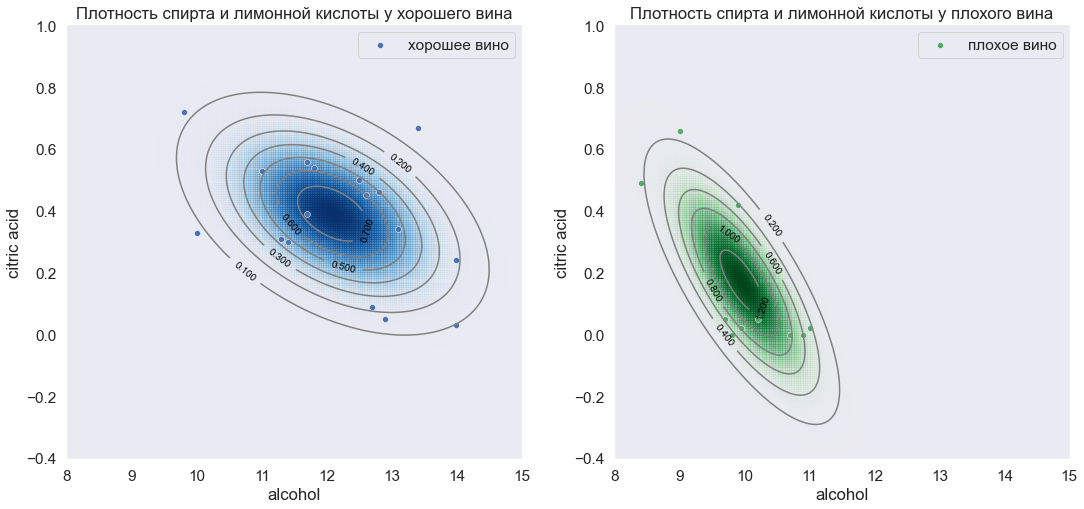

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
cmaps = [get_density_cmap("Blues"), get_density_cmap("Greens")]
pdfs = [good_pdf, bad_pdf]
wines = [good_wine, bad_wine]
means = [good_mu, bad_mu]

colors = ["b", "g"]
titles = ['хорошего', 'плохого']
legends = ['хорошее', 'плохое']

for i in range(2):
    axes[i].pcolormesh(X, Y, pdfs[i], cmap=cmaps[i], shading='auto')
    cs = axes[i].contour(X, Y, pdfs[i], colors="grey")
    axes[i].clabel(cs, cs.levels, fontsize=10, colors='black')
    sns.scatterplot(ax=axes[i], data=wines[i], x='alcohol', y='citric acid', color=colors[i], label=f"{legends[i]} вино")
    axes[i].set_title(f"Плотность спирта и лимонной кислоты у {titles[i]} вина")
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** можно увидеть, что у хороших вин содержание алкоголя заметно больше чем у плохих и разлетается сильнее. Содержание лимонной кислоты у хороших вин так же выше, но у плохих вин оно разлетается сильнее.

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Функция правдоподобия выглядит как:
\begin{equation*}
f_{\theta }( X) =\theta ^{\sum X_{i}}( 1-\theta )^{n-\sum X_{i}}
\end{equation*}
Тогда:
\begin{equation*}
u_{\theta }( X) =\nabla _{\theta }\ln f_{\theta }( X) =\frac{\sum X_{i}}{\theta } -\frac{n-\sum X_{i}}{1-\theta } =\frac{\sum X_{i} -n\theta }{\theta ( 1-\theta )} =\frac{n}{\theta ( 1-\theta )}(\overline{X} -\theta ) .
\end{equation*}
По критерию эффективности, получаем:
\begin{gather*}
\theta ^{*} -\theta =c( \theta ) u_{\theta }( X)\\
\theta ^{*} -\theta =c( \theta ) \cdotp \frac{n}{\theta ( 1-\theta )}(\overline{X} -\theta ) \Longrightarrow c( \theta ) =\frac{1}{ni( \theta )} =\frac{\theta ( 1-\theta )}{n} .
\end{gather*}
Итак, эффективная оценка - $\displaystyle \overline{X}$, $\displaystyle i( \theta ) =\frac{1}{\theta ( 1-\theta )}$.

Для этого задания рассмотрим информацию Фишера для одного наблюдения, т.к. размер выборки там не сильно большой роли играет. Тогда нижняя оценка дисперсии несмещенной оценки: $\displaystyle \frac{1}{i( \theta )} =\theta ( 1-\theta ) =\theta -\theta ^{2}$.

In [28]:
thetas = np.arange(0, 1.01, 0.01)
lower_bound = (thetas - np.square(thetas))

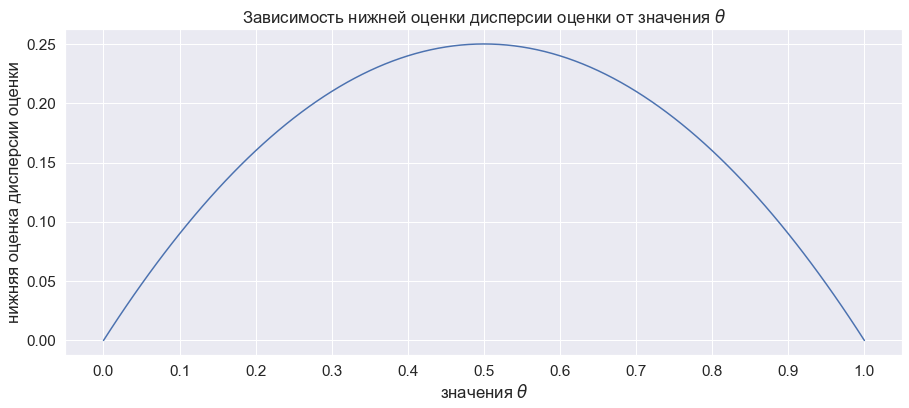

In [29]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=thetas, y=lower_bound)
plt.xlabel("значения $\\theta$")
plt.ylabel("нижняя оценка дисперсии оценки")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Зависимость нижней оценки дисперсии оценки от значения $\\theta$")
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** при $\theta=0.5$ самая высокая оценка снизу получается. Что достаточно естественно, т.к. при таком значении параметра любая несмещенная оценка будет иметь наибольший разлет, т.к. нулей и единиц в выборке будет примерно поровну.

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [30]:
n = 1000
samples = sps.bernoulli(p=thetas).rvs(size=(n, thetas.size))
indices = sps.randint(low=0, high=n).rvs(size=(n, n))
bootstrap_samples = samples[indices].T
sample_means = np.mean(bootstrap_samples, axis=2)
variances = np.mean(np.square(sample_means), axis=1) - np.square(np.mean(sample_means, axis=1))

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

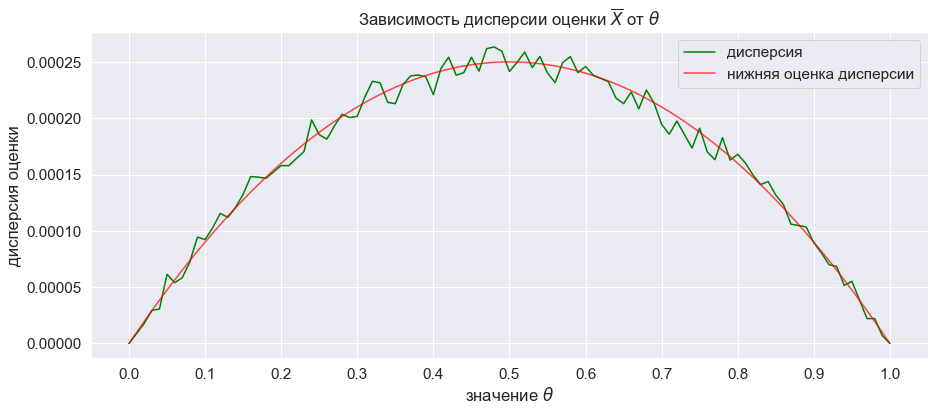

In [31]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=thetas, y=variances, color='green', label='дисперсия')
sns.lineplot(x=thetas, y=lower_bound / n, color='red', alpha=0.7, label='нижняя оценка дисперсии')
plt.xlabel("значение $\\theta$")
plt.ylabel("дисперсия оценки")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Зависимость дисперсии оценки $\\overline{X}$ от $\\theta$")
plt.show()

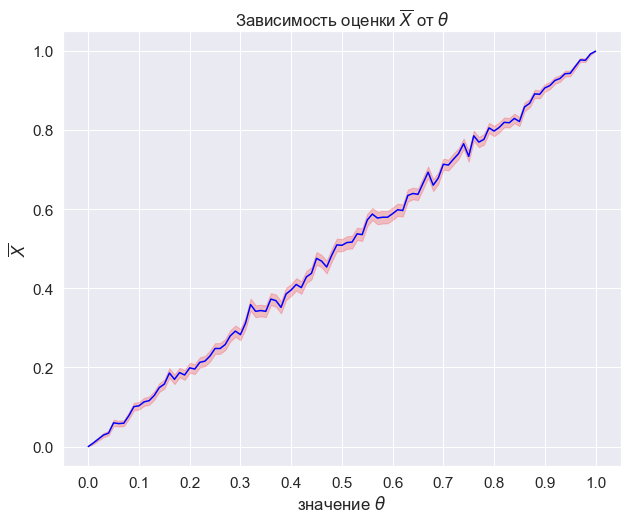

In [32]:
std_deviation = np.sqrt(variances)
theta_hat = np.mean(samples, axis=0)
plt.figure(figsize=(10, 8))
sns.lineplot(x=thetas, y=theta_hat, color='blue')
plt.fill_between(x=thetas, 
                 y1=theta_hat - std_deviation, 
                 y2=theta_hat + std_deviation, 
                 color='red', 
                 alpha=0.2)
plt.xlabel("значение $\\theta$")
plt.ylabel("$\\overline{X}$")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Зависимость оценки $\\overline{X}$ от $\\theta$")
plt.show()

**Вывод**

из последнего графика явно видно, что с ростом параметра выборочное среднее все стремится к `1`, потому что вероятность появления `1` в выборке растет. А по графику, который выше, можно сделать вывод, что дисперсия оценка оказалась почти равна своей нижней оценке, т.к. $\overline{X}$ эффективная оценка.